In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
transform  = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,),(0.5,))])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!mkdir MNISTdata

In [ ]:
%cd MNISTdata

/content/drive/MyDrive/MNISTdata


In [ ]:
!mkdir train
!mkdir validation

In [ ]:
trainset = datasets.MNIST('/content/drive/MyDrive/MNISTdata/train/',download=False,train=True,transform=transform)
valset = datasets.MNIST('/content/drive/MyDrive/MNISTdata/validation/',download=False,train=False,transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

valloader = torch.utils.data.DataLoader(valset,batch_size=64,shuffle=True)


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28]) tensor(1.)
torch.Size([64])


In [ ]:
lab = torch.zeros(2,2)
lab

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
labels

tensor([3, 2, 0, 8, 4, 3, 2, 2, 2, 8, 8, 6, 7, 2, 0, 7, 3, 6, 9, 7, 2, 4, 9, 5,
        4, 3, 0, 2, 2, 8, 0, 9, 5, 4, 5, 8, 5, 0, 2, 5, 9, 7, 7, 1, 2, 7, 9, 8,
        8, 6, 9, 2, 5, 0, 0, 7, 2, 7, 9, 3, 4, 9, 7, 9])

In [ ]:
lab = torch.zeros(2,labels.shape[0])
lab[0,:] = labels
for i in range(labels.shape[0]):
    lab[0,i] = labels[i]
    lab[1,i] = 1

In [ ]:
lab

tensor([[3., 2., 0., 8., 4., 3., 2., 2., 2., 8., 8., 6., 7., 2., 0., 7., 3., 6.,
         9., 7., 2., 4., 9., 5., 4., 3., 0., 2., 2., 8., 0., 9., 5., 4., 5., 8.,
         5., 0., 2., 5., 9., 7., 7., 1., 2., 7., 9., 8., 8., 6., 9., 2., 5., 0.,
         0., 7., 2., 7., 9., 3., 4., 9., 7., 9.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

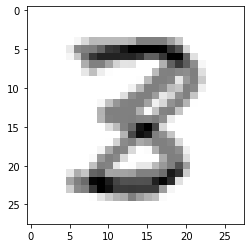

In [ ]:
plt.imshow((images[0]+images[1]).numpy().squeeze(),cmap='gray_r')

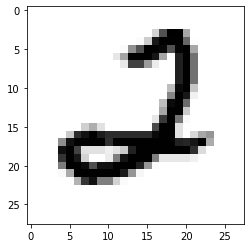

In [ ]:
plt.imshow(images[0].numpy().squeeze(),cmap='gray_r')

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 11

In [ ]:
model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],output_size),
                      nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=11, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)
#print(images.shape)
logps = model(images)
loss = criterion(logps,labels)
print('Before back pass: ',model[0].weight.grad)
loss.backward()
print('After ',model[0].weight.grad)


Before back pass:  None
After  tensor([[-9.5139e-06, -9.5139e-06, -9.5139e-06,  ..., -9.5139e-06,
         -9.5139e-06, -9.5139e-06],
        [-3.9178e-04, -3.9178e-04, -3.9178e-04,  ..., -3.9178e-04,
         -3.9178e-04, -3.9178e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [-7.9936e-04, -7.9936e-04, -7.9936e-04,  ..., -7.9936e-04,
         -7.9936e-04, -7.9936e-04],
        [-4.1806e-04, -4.1806e-04, -4.1806e-04,  ..., -4.1806e-04,
         -4.1806e-04, -4.1806e-04],
        [-3.6436e-03, -3.6436e-03, -3.6436e-03,  ..., -3.6436e-03,
         -3.6436e-03, -3.6436e-03]])


In [ ]:
optimizer = optim.SGD(model.parameters(),lr = 0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        #lab = torch.zeros(labels.shape[0],2)
        #lab[:,0] = labels
        for i in range(1,6):
            images[5*i] = images[5*i] + images[5*i + 1]
            labels[5*i] = 10
        images = images.view(images.shape[0],-1)

        optimizer.zero_grad()
        output = model(images)
        print("output shape: ",output.shape)
        print("label shape: ",labels.shape)
        loss = criterion(output,labels)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e,running_loss/len(trainloader)))
print("\nTraining Time (in minutes) = ", (time()-time0)/60)       

output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([64])
output shape:  torch.Size([64, 11])
label shape:  torch.Size([

KeyboardInterrupt: ignored

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        if i%5 == 0:
            img = (images[i]+images[i-1]).view(1, 784)
            labels[i] = 10
        else:
            
      
            img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9837


In [ ]:
dataiter = iter(valloader)
vimg,vlab = dataiter.next()
vlab[2]

tensor(6)

In [ ]:
img = (vimg[2]).view(1,784)
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
print(ps)
probab = list(ps.numpy()[0])
pred_label = probab.index(max(probab))
pred_label

tensor([[9.9985e-01, 3.5484e-06, 1.7004e-06, 1.0657e-06, 4.1744e-09, 1.2326e-04,
         1.6296e-07, 6.0311e-06, 1.2062e-07, 1.1772e-06, 1.5953e-05]])


0

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
      
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9771


In [ ]:
torch.save(model, '/content/drive/MyDrive/MNISTdata/my_mnist_model_with_11.pt') 

In [ ]:
import torch
import torch.nn as nn
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import numpy as np

In [ ]:

class Encoder(nn.Module):
  def __init__(self,device):
    super().__init__()
    self.enc1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1),  # b, 16, 10, 10
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2))  # b, 16, 5, 5

    self.enc2 = nn.Sequential(
            nn.Conv2d(16, 8, 3, stride=2, padding=1),  # b, 8, 3, 3
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1))  # b, 8, 2, 2
  def forward(self,x):
    x=self.enc1(x)
    #print(x.shape)
    x=self.enc2(x)
    #print(x.shape)
    return x


class Decoder(nn.Module):
  def __init__(self,device):
    super().__init__()
    self.dec1 = nn.Sequential(nn.ConvTranspose2d(8, 16, 3, stride=2),  # b, 16, 5, 5
            nn.ReLU(True))
    self.dec2 = nn.Sequential(nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  # b, 8, 15, 15
            nn.ReLU(True))
    self.dec3 = nn.Sequential(nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),  # b, 1, 28, 28
            nn.Tanh())

  def forward(self,x):
    x=self.dec1(x)
    x=self.dec2(x)
    x=self.dec3(x)
    return x

class AutoEncoder(nn.Module):
  def __init__(self,device):
    super().__init__()
    self.enc=Encoder(device).to(device = device)
    self.dec =Decoder(device).to(device = device)
  def forward(self,x):
    enc=self.enc(x)
    dec=self.dec(enc)
    return dec





In [ ]:
class Trainer:
  def __init__(self,trainset,valset):
    self.device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    self.model = AutoEncoder(self.device).to(device=self.device)
    self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=0.001)
    self.trainset=trainset
    self.valset=valset
    self.train_loader = torch.utils.data.DataLoader(self.trainset,batch_size=64,shuffle=True,num_workers=2)
    self.val_loader = torch.utils.data.DataLoader(self.valset,batch_size=64,shuffle=True,num_workers=2)
    self.writer = SummaryWriter('/content/drive/MyDrive/MNISTdata/tblogs') 
  def train(self,epochs=10):
    self.model.train()
    step = 0
    for epoch in tqdm(range(epochs),unit="epochs"):
      loss_list =[]
      for images, labels in self.train_loader:
        imgs=images.to(self.device)
        pred = self.model(imgs)
        losses =self.loss(pred,imgs)
        self.optimizer.zero_grad()
        losses.backward()
        self.optimizer.step()
        
      
        loss_list.append(losses.item())
        if step%10 ==0:
          self.writer.add_scalar('Loss/train', np.array(loss_list).mean(),step)
      print(np.array(loss_list).mean())

  def loss(self,pred,target):
    return nn.MSELoss()(pred,target)
  
  def predict(self,x):
    self.model.eval()
    with torch.no_grad():
      pred = self.model(x)
    return pred 

In [ ]:
transform  = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))
                                ])

trainset = datasets.MNIST('/content/drive/MyDrive/MNISTdata/train/',download=False,train=True,transform=transform)
valset = datasets.MNIST('/content/drive/MyDrive/MNISTdata/validation/',download=False,train=False,transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

valloader = torch.utils.data.DataLoader(valset,batch_size=64,shuffle=True)


In [ ]:
dataiter = iter(valloader)
images, labels = dataiter.next()

print(images.shape,images.min(),images.max())
print(labels.shape)

torch.Size([64, 1, 28, 28]) tensor(-1.) tensor(1.)
torch.Size([64])


In [ ]:

trainer = Trainer(trainset,valset)

In [ ]:

trainer.train(60)



  0%|          | 0/60 [00:00<?, ?epochs/s]

  2%|▏         | 1/60 [00:12<12:02, 12.24s/epochs]

0.09556191027768131




  3%|▎         | 2/60 [00:24<11:53, 12.31s/epochs]

0.09540037937891255




  5%|▌         | 3/60 [00:37<11:42, 12.33s/epochs]

0.09529360885749748




  7%|▋         | 4/60 [00:49<11:32, 12.37s/epochs]

0.09522708399749513




  8%|▊         | 5/60 [01:02<11:22, 12.41s/epochs]

0.09514994359315077




 10%|█         | 6/60 [01:14<11:09, 12.39s/epochs]

0.09501052567604254




 12%|█▏        | 7/60 [01:26<10:52, 12.31s/epochs]

0.09491425632699721




 13%|█▎        | 8/60 [01:38<10:39, 12.29s/epochs]

0.09476174576196081




 15%|█▌        | 9/60 [01:51<10:27, 12.30s/epochs]

0.09464668162437136




 17%|█▋        | 10/60 [02:03<10:15, 12.32s/epochs]

0.0946254873437795




 18%|█▊        | 11/60 [02:15<10:03, 12.33s/epochs]

0.0944909520590229




 20%|██        | 12/60 [02:28<09:52, 12.35s/epochs]

0.09450042964235297




 22%|██▏       | 13/60 [02:40<09:42, 12.39s/epochs]

0.09432821785971554




 23%|██▎       | 14/60 [02:53<09:29, 12.38s/epochs]

0.09423204608309244




 25%|██▌       | 15/60 [03:05<09:16, 12.37s/epochs]

0.0941311133695818




 27%|██▋       | 16/60 [03:18<09:11, 12.53s/epochs]

0.09408384992846294




 28%|██▊       | 17/60 [03:30<08:58, 12.52s/epochs]

0.09397007141317894




 30%|███       | 18/60 [03:43<08:43, 12.47s/epochs]

0.09397277982631472




 32%|███▏      | 19/60 [03:55<08:32, 12.49s/epochs]

0.09376240767903928




 33%|███▎      | 20/60 [04:07<08:16, 12.42s/epochs]

0.093667774375822




 35%|███▌      | 21/60 [04:20<08:01, 12.35s/epochs]

0.09363321956795162




 37%|███▋      | 22/60 [04:32<07:49, 12.35s/epochs]

0.09340216529204139




 38%|███▊      | 23/60 [04:44<07:36, 12.33s/epochs]

0.09340262796674202




 40%|████      | 24/60 [04:57<07:25, 12.36s/epochs]

0.0933793221773115




 42%|████▏     | 25/60 [05:09<07:11, 12.33s/epochs]

0.09323286238128442




 43%|████▎     | 26/60 [05:21<06:57, 12.29s/epochs]

0.09308813413037166




 45%|████▌     | 27/60 [05:33<06:44, 12.26s/epochs]

0.09307996607792657




 47%|████▋     | 28/60 [05:45<06:30, 12.22s/epochs]

0.09295420143713574




 48%|████▊     | 29/60 [05:58<06:19, 12.23s/epochs]

0.09294632666591388




 50%|█████     | 30/60 [06:10<06:06, 12.23s/epochs]

0.09285161130305038




 52%|█████▏    | 31/60 [06:22<05:53, 12.20s/epochs]

0.09275901483606173




 53%|█████▎    | 32/60 [06:34<05:40, 12.15s/epochs]

0.09270677103130802




 55%|█████▌    | 33/60 [06:46<05:28, 12.16s/epochs]

0.09264714162804678




 57%|█████▋    | 34/60 [06:58<05:16, 12.18s/epochs]

0.09253706555090734




 58%|█████▊    | 35/60 [07:11<05:05, 12.21s/epochs]

0.09239985488815856




 60%|██████    | 36/60 [07:23<04:54, 12.25s/epochs]

0.09247025710814544




 62%|██████▏   | 37/60 [07:36<04:43, 12.31s/epochs]

0.09239494208810425




 63%|██████▎   | 38/60 [07:48<04:31, 12.33s/epochs]

0.0923274687961983




 65%|██████▌   | 39/60 [08:00<04:18, 12.29s/epochs]

0.09224138480386754




 67%|██████▋   | 40/60 [08:13<04:06, 12.32s/epochs]

0.09219784525507041




 68%|██████▊   | 41/60 [08:25<03:53, 12.31s/epochs]

0.09215084067794052




 70%|███████   | 42/60 [08:37<03:41, 12.30s/epochs]

0.09202841560501279




 72%|███████▏  | 43/60 [08:49<03:29, 12.32s/epochs]

0.09206234014777741




 73%|███████▎  | 44/60 [09:02<03:16, 12.31s/epochs]

0.09203224766578501




 75%|███████▌  | 45/60 [09:14<03:03, 12.27s/epochs]

0.09188097803545658




 77%|███████▋  | 46/60 [09:26<02:51, 12.25s/epochs]

0.09185536602126763




 78%|███████▊  | 47/60 [09:38<02:38, 12.22s/epochs]

0.09173033296712425




 80%|████████  | 48/60 [09:50<02:26, 12.21s/epochs]

0.0917308063411128




 82%|████████▏ | 49/60 [10:03<02:14, 12.25s/epochs]

0.09163552379684407




 83%|████████▎ | 50/60 [10:15<02:02, 12.26s/epochs]

0.0916273468561264




 85%|████████▌ | 51/60 [10:27<01:49, 12.22s/epochs]

0.09158981910773686




 87%|████████▋ | 52/60 [10:39<01:37, 12.18s/epochs]

0.09144445034518425




 88%|████████▊ | 53/60 [10:51<01:25, 12.18s/epochs]

0.09139679774228952




 90%|█████████ | 54/60 [11:04<01:13, 12.21s/epochs]

0.09141925775579043




 92%|█████████▏| 55/60 [11:16<01:00, 12.18s/epochs]

0.09133668104087365




 93%|█████████▎| 56/60 [11:28<00:48, 12.18s/epochs]

0.09130367400772027




 95%|█████████▌| 57/60 [11:40<00:36, 12.19s/epochs]

0.09124290346622721




 97%|█████████▋| 58/60 [11:53<00:24, 12.21s/epochs]

0.09124582901851201




 98%|█████████▊| 59/60 [12:05<00:12, 12.20s/epochs]

0.09120099935958635




100%|██████████| 60/60 [12:17<00:00, 12.29s/epochs]

0.0912041702011882


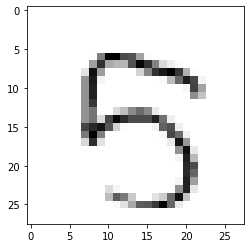

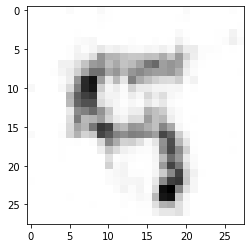

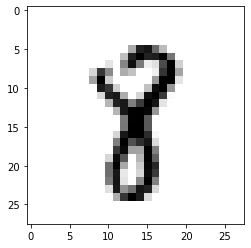

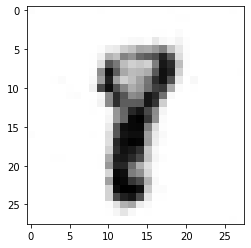

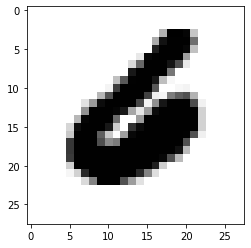

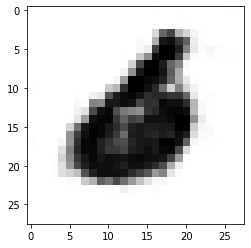

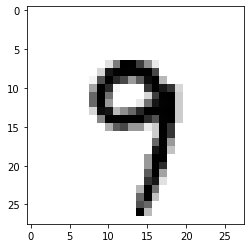

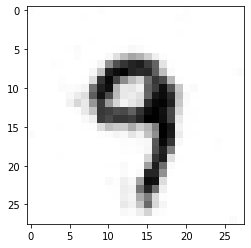

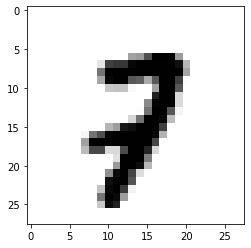

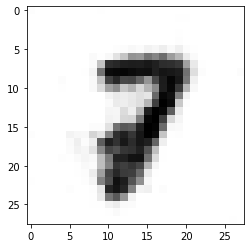

In [ ]:

pred =trainer.predict(images.to(device=trainer.device))
for i in range(5):
  id=i*10
  plt.figure()
  plt.imshow(images[id].numpy().squeeze(),cmap='gray_r')
  plt.figure()
  plt.imshow(pred[id].cpu().numpy().squeeze(),cmap='gray_r')

In [ ]:
class Attacker(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 =nn.Linear(32,32)
    self.fc2 = nn.Linear(32,32)
    self.fc3=nn.Linear(32,11)
    self.softmax =nn.Softmax(dim=1)
  def forward(self,x):
    x=nn.Flatten()(x)
    x=nn.ReLU()(self.fc1(x))
    x=nn.ReLU()(self.fc2(x))
    x=self.softmax(self.fc3(x))
    return x

class GAN(nn.Module):
  def __init__(self,device):
    super().__init__()
    self.attacker=Attacker().to(device)
    self.enc= Encoder(device).to(device)
  def forward(self,x):
    x=self.enc(x)
    x=self.attacker(x)
    return x

class GANTrainer:
  def __init__(self,trainset,valset,batch_sz=64):
      self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

      self.enc = Encoder(self.device).to(self.device)
      self.attacker= Attacker().to(self.device)

      self.optim_enc=torch.optim.AdamW(self.enc.parameters(),lr=0.001)
      self.optim_attack=torch.optim.AdamW(self.attacker.parameters(),lr=0.001)

      self.trainset=trainset
      self.valset=valset
      self.train_loader = torch.utils.data.DataLoader(self.trainset,batch_size=batch_sz,shuffle=True,num_workers=2)
      self.val_loader = torch.utils.data.DataLoader(self.valset,batch_size=batch_sz,shuffle=True,num_workers=2)
      self.batch_sz =batch_sz


  def attacker_loss(self,pred,labels):
      delta=0.01
      one_hot =torch.zeros_like(pred).to(self.device)
      one_hot.scatter_(1,labels.unsqueeze(1),1)
      loss =-torch.sum(torch.log(pred+delta)*one_hot)/self.batch_sz
      return loss
  def enc_loss(self,pred,labels):
    one_hot =torch.zeros_like(pred).to(self.device)
    one_hot.scatter_(1,labels.unsqueeze(1),1)
    delta=0.01
    loss = -(torch.sum(torch.log(1-pred[:,-1]+delta)*(1-one_hot[:,-1]))+torch.sum(torch.log(1-pred[:,:-1]+delta)*one_hot[:,:-1])+torch.sum(torch.log(pred[:,-1]+delta)*one_hot[:,-1]))/self.batch_sz
    return loss

  
  def train(self,epochs=10,train_both=True):
    attack_train = not(train_both)
    for epoch in tqdm(range(epochs),unit="epochs"):
      step =0
      count =0
      loss_list_enc=[]
      loss_list_atk=[]
      for images, labels in self.train_loader:
        for i in range(1,6):
          images[5*i] = images[5*i] + images[5*i + 1]
          labels[5*i] = 10
        imgs=images.to(self.device)
        labels=labels.to(self.device)

        if not(attack_train):
          self.optim_enc.zero_grad()
          enc = self.enc(imgs)
          pred_enc = self.attacker(enc)
          enc_loss = self.enc_loss(pred_enc,labels)
          enc_loss.backward()
          self.optim_enc.step()
          loss_list_enc.append(enc_loss.item())
        else:
          self.optim_attack.zero_grad()
          enc = self.enc(imgs)
          pred_attack=self.attacker(enc.detach())
          attack_loss= self.attacker_loss(pred_attack,labels)
          attack_loss.backward()
          self.optim_attack.step()
          loss_list_atk.append(attack_loss.item())

        if train_both:
          count+=1
          if count==30 and attack_train:
            attack_train = False
            count =0
          elif count ==5 and not(attack_train):
            attack_train = True
            count =0
        else:
          attack_train=True
        
      print(np.array(loss_list_enc).mean() if train_both else "Enc fixed",np.array(loss_list_atk).mean())
    
  def train_attacker(self,epochs=10):
    for epoch in tqdm(range(epochs),unit="epochs"):
      step =0
      count =0
      loss_list=[]
      for images, labels in self.train_loader:
        for i in range(1,6):
          images[5*i] = images[5*i] + images[5*i + 1]
          labels[5*i] = 10
        imgs=images.to(self.device)
        labels=labels.to(self.device)
      
        pred = self.attacker(self.enc(imgs))

        losses =self.attacker_loss(pred,labels)
        self.optim_attack.zero_grad()
        self.optim_enc.zero_grad()
        losses.backward()
        self.optim_enc.step()
        self.optim_attack.step()

        loss_list.append(losses.item())
      print(np.array(loss_list).mean())

  
gantrainer =GANTrainer(trainset,valset)

In [ ]:
gantrainer.train_attacker(10)

 10%|█         | 1/10 [00:12<01:49, 12.15s/epochs]

0.821302572436043


 20%|██        | 2/10 [00:24<01:37, 12.13s/epochs]

0.3505533052914178


 30%|███       | 3/10 [00:36<01:24, 12.10s/epochs]

0.2717179336082707


 40%|████      | 4/10 [00:48<01:12, 12.15s/epochs]

0.23837590127833871


 50%|█████     | 5/10 [01:00<01:00, 12.19s/epochs]

0.21672781469868319


 60%|██████    | 6/10 [01:13<00:48, 12.22s/epochs]

0.20153853557964188


 70%|███████   | 7/10 [01:25<00:36, 12.25s/epochs]

0.19059819799822086


 80%|████████  | 8/10 [01:37<00:24, 12.21s/epochs]

0.18037032743475076


 90%|█████████ | 9/10 [01:49<00:12, 12.19s/epochs]

0.1723345274121554


100%|██████████| 10/10 [02:01<00:00, 12.18s/epochs]

0.1688567341934802


In [ ]:
with torch.no_grad():
  preds=gantrainer.gan(images.to(gantrainer.device)).cpu().numpy()
  preds=np.argmax(preds,1)
  print(preds.shape)

(64,)


In [ ]:
print(labels)
print(preds)
sum(preds ==labels.numpy())

tensor([7, 3, 9, 9, 0, 1, 1, 3, 9, 8, 1, 3, 5, 8, 1, 0, 6, 8, 9, 5, 8, 0, 2, 6,
        8, 0, 7, 4, 8, 7, 7, 4, 3, 7, 2, 2, 7, 0, 2, 2, 1, 0, 7, 1, 8, 7, 9, 5,
        8, 1, 0, 8, 1, 6, 1, 0, 2, 5, 1, 3, 6, 4, 5, 4])
[7 3 8 9 0 1 1 3 9 8 1 3 5 8 1 0 6 8 9 5 8 0 2 6 8 0 7 4 8 7 7 4 3 7 2 2 7
 0 2 2 1 0 7 1 8 7 9 5 8 1 4 8 1 6 1 0 2 5 1 8 6 4 6 4]


60

In [ ]:
gantrainer.train(100)


  1%|          | 1/100 [00:11<19:43, 11.96s/epochs]

0.13803610928632595 2.0498908345458813


  2%|▏         | 2/100 [00:23<19:32, 11.97s/epochs]

0.0870413325726986 1.9939683606423955


  3%|▎         | 3/100 [00:35<19:16, 11.92s/epochs]

0.08626981933529561 1.9939903256916764


  4%|▍         | 4/100 [00:47<19:04, 11.92s/epochs]

0.08282226043251845 2.006848657485282


  5%|▌         | 5/100 [00:59<18:49, 11.89s/epochs]

0.0791316033555911 2.0265288138301067


  6%|▌         | 6/100 [01:11<18:31, 11.82s/epochs]

0.07837142474376238 2.0301851450216652


  7%|▋         | 7/100 [01:22<18:18, 11.81s/epochs]

0.07928202633674328 2.0236556839824904
0.07923353194044186 2.0212626623930317


  9%|▉         | 9/100 [01:46<17:55, 11.82s/epochs]

0.07867151607687657 2.0250061979093172


 10%|█         | 10/100 [01:58<17:48, 11.88s/epochs]

0.07840791132587653 2.028254613722905


 11%|█         | 11/100 [02:10<17:31, 11.82s/epochs]

0.07853381725457999 2.027539494309095


 12%|█▏        | 12/100 [02:22<17:20, 11.82s/epochs]

0.07796284235440767 2.027790942035689


 13%|█▎        | 13/100 [02:33<17:08, 11.82s/epochs]

0.07819408911925096 2.0293940645043214


 14%|█▍        | 14/100 [02:45<16:59, 11.85s/epochs]

0.07876572895508546 2.0276932697189918


 15%|█▌        | 15/100 [02:57<16:48, 11.86s/epochs]

0.07884330038840955 2.025522224236243


 16%|█▌        | 16/100 [03:09<16:34, 11.84s/epochs]

0.07737625785745107 2.0324859883230513


 17%|█▋        | 17/100 [03:21<16:17, 11.78s/epochs]

0.0775782411488203 2.032752843924088


 18%|█▊        | 18/100 [03:32<16:07, 11.79s/epochs]

0.07739685533138421 2.0323370762980812


 19%|█▉        | 19/100 [03:44<15:55, 11.80s/epochs]

0.07738009095191956 2.0324324844497266


 20%|██        | 20/100 [03:56<15:45, 11.82s/epochs]

0.07742366200456252 2.032248536917833


 21%|██        | 21/100 [04:08<15:36, 11.86s/epochs]

0.0775788138119074 2.0326719831417104


 22%|██▏       | 22/100 [04:20<15:26, 11.88s/epochs]

0.07727058650209354 2.0324169673246915


 23%|██▎       | 23/100 [04:32<15:15, 11.89s/epochs]

0.07735460578249051 2.0322997904207445


 24%|██▍       | 24/100 [04:44<15:02, 11.88s/epochs]

0.07730565151342979 2.032009811242028


 25%|██▌       | 25/100 [04:56<14:52, 11.90s/epochs]

0.07728263328854855 2.0319467156682864


 26%|██▌       | 26/100 [05:08<14:41, 11.92s/epochs]

0.07727694562994517 2.032119362661154


 27%|██▋       | 27/100 [05:20<14:30, 11.92s/epochs]

0.0773143035861162 2.0318746817584086


 28%|██▊       | 28/100 [05:32<14:19, 11.94s/epochs]

0.07733153809721653 2.0318153738090308


 29%|██▉       | 29/100 [05:44<14:09, 11.97s/epochs]

0.07738714693830563 2.0318637510189914


 30%|███       | 30/100 [05:56<13:57, 11.97s/epochs]

0.07740698559926107 2.0317379197861887


 31%|███       | 31/100 [06:07<13:40, 11.90s/epochs]

0.07746373523886387 2.0319888189730078


 32%|███▏      | 32/100 [06:19<13:28, 11.89s/epochs]

0.07721118313761857 2.0316580405624785


 33%|███▎      | 33/100 [06:31<13:15, 11.88s/epochs]

0.0773207623224992 2.0317328955867504


 34%|███▍      | 34/100 [06:43<13:03, 11.87s/epochs]

0.07738584446219297 2.0318867171754933


 35%|███▌      | 35/100 [06:55<12:54, 11.91s/epochs]

0.07731312840030743 2.031606449939237


 36%|███▌      | 36/100 [07:07<12:43, 11.93s/epochs]

0.07729258663379229 2.0317316635115312


 37%|███▋      | 37/100 [07:19<12:29, 11.90s/epochs]

0.07720370733967194 2.031510425971286


 38%|███▊      | 38/100 [07:31<12:16, 11.87s/epochs]

0.0774129477257912 2.031860184108857


 39%|███▉      | 39/100 [07:43<12:05, 11.90s/epochs]

0.07745721901838597 2.0316622107483373


 40%|████      | 40/100 [07:55<11:59, 12.00s/epochs]

0.0773395832341451 2.0319268610512857


 41%|████      | 41/100 [08:07<11:46, 11.97s/epochs]

0.07725084143189284 2.031458380346251


 42%|████▏     | 42/100 [08:19<11:33, 11.95s/epochs]

0.07732530643160526 2.031735254101234


 43%|████▎     | 43/100 [08:31<11:21, 11.96s/epochs]

0.07740020528435707 2.031573766676506


 44%|████▍     | 44/100 [08:42<11:06, 11.91s/epochs]

0.0773512738255354 2.031591580793409


 45%|████▌     | 45/100 [08:54<10:52, 11.87s/epochs]

0.0773505931863418 2.031716213663026


 46%|████▌     | 46/100 [09:06<10:38, 11.83s/epochs]

0.07731464505195618 2.0315624550722613


 47%|████▋     | 47/100 [09:18<10:26, 11.82s/epochs]

0.07728086744363491 2.0315061786977373


 48%|████▊     | 48/100 [09:29<10:13, 11.80s/epochs]

0.07722032310870977 2.0315893909128584


 49%|████▉     | 49/100 [09:41<10:04, 11.85s/epochs]

0.07730229365137907 2.0314508075318716


 50%|█████     | 50/100 [09:53<09:50, 11.82s/epochs]

0.07736442226629991 2.031444300593126


 51%|█████     | 51/100 [10:05<09:39, 11.82s/epochs]

0.07738233684347226 2.031580708404579


 52%|█████▏    | 52/100 [10:17<09:29, 11.86s/epochs]

0.07723521292209626 2.0315137441353044


 53%|█████▎    | 53/100 [10:29<09:16, 11.84s/epochs]

0.07736356378747866 2.0316139166012848


 54%|█████▍    | 54/100 [10:40<09:03, 11.82s/epochs]

0.07738304109527515 2.0315932678704214


 55%|█████▌    | 55/100 [10:52<08:50, 11.78s/epochs]

0.07741204580435386 2.0317243395170363


 56%|█████▌    | 56/100 [11:04<08:35, 11.72s/epochs]

0.0773994134595761 2.0314723543896536


 57%|█████▋    | 57/100 [11:15<08:23, 11.72s/epochs]

0.07739202953301944 2.0315754257953995


 58%|█████▊    | 58/100 [11:27<08:09, 11.66s/epochs]

0.07723658371430177 2.0313887946528966


 59%|█████▉    | 59/100 [11:38<07:56, 11.63s/epochs]

0.07738961376822912 2.0316155654664088


 60%|██████    | 60/100 [11:50<07:44, 11.62s/epochs]

0.07727419837163045 2.03147220464036


 61%|██████    | 61/100 [12:02<07:32, 11.59s/epochs]

0.0773666752072481 2.0314141636585243


 62%|██████▏   | 62/100 [12:13<07:20, 11.60s/epochs]

0.07721207136145004 2.0313647691861236


 63%|██████▎   | 63/100 [12:25<07:09, 11.62s/epochs]

0.07740714005552805 2.031709833089078


 64%|██████▍   | 64/100 [12:37<06:58, 11.62s/epochs]

0.07722093067490138 2.0315355232151426


 65%|██████▌   | 65/100 [12:48<06:47, 11.64s/epochs]

0.07736807975631493 2.031588654116829


 66%|██████▌   | 66/100 [13:00<06:35, 11.64s/epochs]

0.07732012403699068 2.0315795464090782


 67%|██████▋   | 67/100 [13:11<06:23, 11.61s/epochs]

0.07728416186112624 2.0314084194084203


 68%|██████▊   | 68/100 [13:23<06:12, 11.63s/epochs]

0.07726790555394612 2.031367465779923


 69%|██████▉   | 69/100 [13:35<06:00, 11.63s/epochs]

0.07740046760210624 2.031461453673863


 70%|███████   | 70/100 [13:46<05:47, 11.58s/epochs]

0.07733755432642424 2.0314920433972143


 71%|███████   | 71/100 [13:58<05:35, 11.57s/epochs]

0.07740815430879593 2.0316518508266697


 72%|███████▏  | 72/100 [14:09<05:21, 11.48s/epochs]

0.07732015189069968 2.0316560451347048


 73%|███████▎  | 73/100 [14:20<05:08, 11.43s/epochs]

0.07735480700547878 2.031578697559267


 74%|███████▍  | 74/100 [14:32<04:58, 11.47s/epochs]

0.07720358841694318 2.031426387036791


 75%|███████▌  | 75/100 [14:43<04:45, 11.44s/epochs]

0.07738894447684289 2.031474416651348


 76%|███████▌  | 76/100 [14:55<04:34, 11.45s/epochs]

0.07735349272306148 2.031433343149648


 77%|███████▋  | 77/100 [15:06<04:22, 11.43s/epochs]

0.07736546643651449 2.0313865338074097


 78%|███████▊  | 78/100 [15:18<04:11, 11.43s/epochs]

0.0772508860207521 2.031461311596455


 79%|███████▉  | 79/100 [15:29<04:01, 11.48s/epochs]

0.07729739443613932 2.031623211385


 80%|████████  | 80/100 [15:41<03:49, 11.47s/epochs]

0.07726213914843706 2.0314436864734877


 81%|████████  | 81/100 [15:52<03:37, 11.44s/epochs]

0.07743168759804506 2.0315469057843236


 82%|████████▏ | 82/100 [16:03<03:26, 11.45s/epochs]

0.07726479940689528 2.0314402368546713


 83%|████████▎ | 83/100 [16:15<03:14, 11.47s/epochs]

0.07721685520731486 2.031480000013172


 84%|████████▍ | 84/100 [16:26<03:03, 11.44s/epochs]

0.07741552872153429 2.0316557831103257


 85%|████████▌ | 85/100 [16:38<02:51, 11.42s/epochs]

0.07728746946041401 2.0314162432557286


 86%|████████▌ | 86/100 [16:49<02:40, 11.43s/epochs]

0.07742983819200443 2.0316582664404765


 87%|████████▋ | 87/100 [17:01<02:28, 11.43s/epochs]

0.07737716344686654 2.0316067561507225


 88%|████████▊ | 88/100 [17:12<02:16, 11.41s/epochs]

0.07734211092958083 2.0315800818181273


 89%|████████▉ | 89/100 [17:23<02:05, 11.40s/epochs]

0.07742372521987329 2.0317227574858334


 90%|█████████ | 90/100 [17:35<01:53, 11.37s/epochs]

0.07721690953924105 2.0314325556011483


 91%|█████████ | 91/100 [17:46<01:42, 11.41s/epochs]

0.07733168922937833 2.031402551744244


 92%|█████████▏| 92/100 [17:58<01:31, 11.44s/epochs]

0.0772693732036994 2.031557372596004


 93%|█████████▎| 93/100 [18:09<01:19, 11.39s/epochs]

0.3114271531311365 2.2450162467390005


 94%|█████████▍| 94/100 [18:20<01:08, 11.44s/epochs]

0.43784599418823533 2.392000892079703


 95%|█████████▌| 95/100 [18:32<00:56, 11.40s/epochs]

0.43784509645058556 2.392025341491888


 96%|█████████▌| 96/100 [18:43<00:45, 11.37s/epochs]

0.4378458758959403 2.3919253266683898


 97%|█████████▋| 97/100 [18:55<00:34, 11.47s/epochs]

0.4379054436316857 2.3919911232620183


 98%|█████████▊| 98/100 [19:06<00:22, 11.45s/epochs]

0.43788973918327917 2.392015851370179


 99%|█████████▉| 99/100 [19:17<00:11, 11.42s/epochs]

0.43787912543003377 2.3921253790359684


100%|██████████| 100/100 [19:29<00:00, 11.69s/epochs]

0.43779509961605073 2.3917736765181665


In [ ]:
attk_state = gantrainer.attacker.state_dict()
enc_state = gantrainer.enc.state_dict()

In [ ]:
gantrainer.train(100,False)

  1%|          | 1/100 [00:11<19:35, 11.87s/epochs]

Enc fixed 1.6977836301586013


  2%|▏         | 2/100 [00:23<19:21, 11.85s/epochs]

Enc fixed 1.6978891571320451


  3%|▎         | 3/100 [00:35<19:09, 11.85s/epochs]

Enc fixed 1.6976059956718355


  4%|▍         | 4/100 [00:47<19:00, 11.88s/epochs]

Enc fixed 1.698870238210601


  5%|▌         | 5/100 [00:59<18:49, 11.88s/epochs]

Enc fixed 1.694588847696654


  6%|▌         | 6/100 [01:11<18:36, 11.88s/epochs]

Enc fixed 1.6968196228877315


  7%|▋         | 7/100 [01:22<18:20, 11.83s/epochs]

Enc fixed 1.696942893935165


  8%|▊         | 8/100 [01:34<18:04, 11.79s/epochs]

Enc fixed 1.698629915714264


  9%|▉         | 9/100 [01:46<17:57, 11.85s/epochs]

Enc fixed 1.698056669695291


 10%|█         | 10/100 [01:58<17:44, 11.82s/epochs]

Enc fixed 1.6979274707816556


 11%|█         | 11/100 [02:10<17:31, 11.81s/epochs]

Enc fixed 1.6958995921525366


 12%|█▏        | 12/100 [02:22<17:20, 11.82s/epochs]

Enc fixed 1.6978531029941177


 13%|█▎        | 13/100 [02:33<17:03, 11.77s/epochs]

Enc fixed 1.6973846095330172


 14%|█▍        | 14/100 [02:45<16:49, 11.74s/epochs]

Enc fixed 1.696968534734966


 15%|█▌        | 15/100 [02:57<16:36, 11.72s/epochs]

Enc fixed 1.6955651131901406


 16%|█▌        | 16/100 [03:08<16:23, 11.71s/epochs]

Enc fixed 1.6959977734571836


 17%|█▋        | 17/100 [03:20<16:16, 11.76s/epochs]

Enc fixed 1.697604781020679


 18%|█▊        | 18/100 [03:32<16:03, 11.75s/epochs]

Enc fixed 1.6973245379004651


 19%|█▉        | 19/100 [03:43<15:49, 11.72s/epochs]

Enc fixed 1.6966063311613444


 20%|██        | 20/100 [03:55<15:36, 11.70s/epochs]

Enc fixed 1.69736485891759


 21%|██        | 21/100 [04:07<15:26, 11.73s/epochs]

Enc fixed 1.6972418853214808


 22%|██▏       | 22/100 [04:19<15:11, 11.69s/epochs]

Enc fixed 1.6981183491281864


 23%|██▎       | 23/100 [04:30<15:01, 11.71s/epochs]

Enc fixed 1.6959645954022275


 24%|██▍       | 24/100 [04:42<14:49, 11.71s/epochs]

Enc fixed 1.697640446902338


 25%|██▌       | 25/100 [04:54<14:42, 11.77s/epochs]

Enc fixed 1.698114594925187


 26%|██▌       | 26/100 [05:06<14:31, 11.77s/epochs]

Enc fixed 1.6993825878542879


 27%|██▋       | 27/100 [05:17<14:17, 11.74s/epochs]

Enc fixed 1.6982049910244403


 28%|██▊       | 28/100 [05:29<14:07, 11.77s/epochs]

Enc fixed 1.6958458583746383


 29%|██▉       | 29/100 [05:41<13:58, 11.80s/epochs]

Enc fixed 1.6957273956046683


 30%|███       | 30/100 [05:53<13:43, 11.77s/epochs]

Enc fixed 1.696067815078601


 31%|███       | 31/100 [06:05<13:35, 11.82s/epochs]

Enc fixed 1.6969040509607238


 32%|███▏      | 32/100 [06:17<13:25, 11.84s/epochs]

Enc fixed 1.696439312719333


 33%|███▎      | 33/100 [06:28<13:10, 11.80s/epochs]

Enc fixed 1.697408405448328


 34%|███▍      | 34/100 [06:40<12:58, 11.79s/epochs]

Enc fixed 1.696776949774736


 35%|███▌      | 35/100 [06:52<12:51, 11.86s/epochs]

Enc fixed 1.6998823790280804


 36%|███▌      | 36/100 [07:04<12:36, 11.82s/epochs]

Enc fixed 1.6957863570530531


 37%|███▋      | 37/100 [07:16<12:24, 11.82s/epochs]

Enc fixed 1.6961223355996837


 38%|███▊      | 38/100 [07:27<12:10, 11.79s/epochs]

Enc fixed 1.6981902219085043


 39%|███▉      | 39/100 [07:39<11:58, 11.78s/epochs]

Enc fixed 1.6970873683500391


 40%|████      | 40/100 [07:51<11:49, 11.83s/epochs]

Enc fixed 1.6975306887616481


 41%|████      | 41/100 [08:03<11:39, 11.85s/epochs]

Enc fixed 1.6973043025683747


 42%|████▏     | 42/100 [08:15<11:24, 11.81s/epochs]

Enc fixed 1.6994325081422639


 43%|████▎     | 43/100 [08:27<11:14, 11.83s/epochs]

Enc fixed 1.6967424992432218


 44%|████▍     | 44/100 [08:38<11:00, 11.80s/epochs]

Enc fixed 1.698379433866757


 45%|████▌     | 45/100 [08:50<10:51, 11.85s/epochs]

Enc fixed 1.6981766282368316


 46%|████▌     | 46/100 [09:02<10:39, 11.84s/epochs]

Enc fixed 1.6965351020857724


 47%|████▋     | 47/100 [09:14<10:25, 11.80s/epochs]

Enc fixed 1.6975882368555455


 48%|████▊     | 48/100 [09:25<10:13, 11.79s/epochs]

Enc fixed 1.6963803672841362


 49%|████▉     | 49/100 [09:37<10:00, 11.77s/epochs]

Enc fixed 1.6979383910134402


 50%|█████     | 50/100 [09:49<09:49, 11.79s/epochs]

Enc fixed 1.697415005741343


 51%|█████     | 51/100 [10:01<09:35, 11.75s/epochs]

Enc fixed 1.696672414284525


 52%|█████▏    | 52/100 [10:12<09:22, 11.71s/epochs]

Enc fixed 1.6963559057412625


 53%|█████▎    | 53/100 [10:24<09:07, 11.66s/epochs]

Enc fixed 1.69680007942704


 54%|█████▍    | 54/100 [10:35<08:54, 11.63s/epochs]

Enc fixed 1.696372791457532


 55%|█████▌    | 55/100 [10:47<08:43, 11.63s/epochs]

Enc fixed 1.6967106420221105


 56%|█████▌    | 56/100 [10:59<08:31, 11.63s/epochs]

Enc fixed 1.6963254227948341


 57%|█████▋    | 57/100 [11:10<08:20, 11.63s/epochs]

Enc fixed 1.6981213149993912


 58%|█████▊    | 58/100 [11:22<08:07, 11.62s/epochs]

Enc fixed 1.697032062483749


 59%|█████▉    | 59/100 [11:34<07:56, 11.62s/epochs]

Enc fixed 1.6986243576129108


 60%|██████    | 60/100 [11:45<07:44, 11.62s/epochs]

Enc fixed 1.697098280956496


 61%|██████    | 61/100 [11:57<07:33, 11.63s/epochs]

Enc fixed 1.6956811207952276


 62%|██████▏   | 62/100 [12:08<07:22, 11.64s/epochs]

Enc fixed 1.6983317764583172


 63%|██████▎   | 63/100 [12:20<07:09, 11.60s/epochs]

Enc fixed 1.6959562984738015


 64%|██████▍   | 64/100 [12:31<06:55, 11.54s/epochs]

Enc fixed 1.6962979939192342


 65%|██████▌   | 65/100 [12:43<06:43, 11.54s/epochs]

Enc fixed 1.696417473907918


 66%|██████▌   | 66/100 [12:55<06:33, 11.56s/epochs]

Enc fixed 1.6980833277773502


 67%|██████▋   | 67/100 [13:06<06:20, 11.54s/epochs]

Enc fixed 1.6965329966057083


 68%|██████▊   | 68/100 [13:18<06:10, 11.58s/epochs]

Enc fixed 1.6960794815122446


 69%|██████▉   | 69/100 [13:29<06:00, 11.62s/epochs]

Enc fixed 1.6970034275990304


 70%|███████   | 70/100 [13:41<05:48, 11.61s/epochs]

Enc fixed 1.6961771996417787


 71%|███████   | 71/100 [13:53<05:36, 11.61s/epochs]

Enc fixed 1.698248317183208


 72%|███████▏  | 72/100 [14:04<05:25, 11.61s/epochs]

Enc fixed 1.694741802683263


 73%|███████▎  | 73/100 [14:16<05:13, 11.60s/epochs]

Enc fixed 1.6973160125299303


 74%|███████▍  | 74/100 [14:27<05:01, 11.60s/epochs]

Enc fixed 1.6968162876329442


 75%|███████▌  | 75/100 [14:39<04:47, 11.51s/epochs]

Enc fixed 1.6954718816763303


 76%|███████▌  | 76/100 [14:50<04:36, 11.52s/epochs]

Enc fixed 1.6976257853670669


 77%|███████▋  | 77/100 [15:02<04:24, 11.50s/epochs]

Enc fixed 1.696002730746259


 78%|███████▊  | 78/100 [15:13<04:13, 11.51s/epochs]

Enc fixed 1.6960918586264286


 79%|███████▉  | 79/100 [15:25<04:02, 11.55s/epochs]

Enc fixed 1.696682624788935


 80%|████████  | 80/100 [15:37<03:51, 11.59s/epochs]

Enc fixed 1.6975271966157437


 81%|████████  | 81/100 [15:48<03:39, 11.58s/epochs]

Enc fixed 1.696774699413446


 82%|████████▏ | 82/100 [16:00<03:28, 11.59s/epochs]

Enc fixed 1.697751660845173


 83%|████████▎ | 83/100 [16:11<03:17, 11.59s/epochs]

Enc fixed 1.6981187601333487


 84%|████████▍ | 84/100 [16:23<03:04, 11.50s/epochs]

Enc fixed 1.6952025783595754


 85%|████████▌ | 85/100 [16:34<02:52, 11.49s/epochs]

Enc fixed 1.6964333021818703


 86%|████████▌ | 86/100 [16:46<02:40, 11.50s/epochs]

Enc fixed 1.6949292077565752


 87%|████████▋ | 87/100 [16:57<02:29, 11.53s/epochs]

Enc fixed 1.6975014835024185


 88%|████████▊ | 88/100 [17:09<02:18, 11.58s/epochs]

Enc fixed 1.699196990619082


 89%|████████▉ | 89/100 [17:20<02:07, 11.58s/epochs]

Enc fixed 1.6978597325175555


 90%|█████████ | 90/100 [17:32<01:55, 11.59s/epochs]

Enc fixed 1.6972792906039305


 91%|█████████ | 91/100 [17:44<01:44, 11.65s/epochs]

Enc fixed 1.6949655982985425


 92%|█████████▏| 92/100 [17:55<01:32, 11.61s/epochs]

Enc fixed 1.6972258853505668


 93%|█████████▎| 93/100 [18:07<01:21, 11.57s/epochs]

Enc fixed 1.696468874462632


 94%|█████████▍| 94/100 [18:18<01:09, 11.55s/epochs]

Enc fixed 1.6982574002829187


 95%|█████████▌| 95/100 [18:30<00:57, 11.54s/epochs]

Enc fixed 1.6980374269902325


 96%|█████████▌| 96/100 [18:41<00:46, 11.52s/epochs]

Enc fixed 1.6970581496193973


 97%|█████████▋| 97/100 [18:53<00:34, 11.50s/epochs]

Enc fixed 1.696139642297586


 98%|█████████▊| 98/100 [19:04<00:22, 11.50s/epochs]

Enc fixed 1.698473855757764


 99%|█████████▉| 99/100 [19:16<00:11, 11.50s/epochs]

Enc fixed 1.698299111587915


100%|██████████| 100/100 [19:27<00:00, 11.68s/epochs]

Enc fixed 1.698653571132912


In [ ]:
tp=np.array([0]*12)
tot=np.array([0]*12)

for images,labels in gantrainer.val_loader:
      try:
        for i in range(1,16):
          images[4*i] = images[4*i] + images[4*i + 1]
          labels[4*i] = 10
      except:
        break
      imgs=images.to(gantrainer.device)
      labels=labels.cpu().numpy()
      with torch.no_grad():
        pred=gantrainer.attacker(gantrainer.enc(imgs)).cpu().numpy()
      p=pred
      pred =np.argmax(pred,1)
      for i in range(11):
        tot[i]+=sum(labels==i)
        tp[i]+=sum(pred[labels==i]==i)
      tot[11]+=sum(labels!=10)
      tp[11]+=sum(pred[labels!=10]!=10)
      # pred=np.expand_dims(pred,1)
      # labels = np.expand_dims(labels,1)
      # print(pred.shape)
      # print(labels.shape)
      # out=np.concatenate((pred,labels,p),1)
      # print(out)
      #break
print(tp)
print(tot)
print(tp/tot)

[ 343  834   97  268   61   60  282  476   27  127 2340 7082]
[ 745  871  797  754  764  667  738  784  734  790 2340 7644]
[0.46040268 0.95752009 0.1217064  0.35543767 0.07984293 0.08995502
 0.38211382 0.60714286 0.03678474 0.16075949 1.         0.92647828]


In [ ]:
import matplotlib.pyplot as plt
tp=np.array([0]*12)
tot=np.array([0]*12)
no_0 = np.array([])
no_1 = np.array([])
no_2 = np.array([])
no_3 = np.array([])
no_4 = np.array([])
no_5 = np.array([])
no_6 = np.array([])
no_7 = np.array([])
no_8 = np.array([])
no_9 = np.array([])

for images,labels in gantrainer.val_loader:
      try:
        for i in range(1,16):
          images[4*i] = images[4*i] + images[4*i + 1]
          labels[4*i] = 10
      except:
        break
      imgs=images.to(gantrainer.device)
      labels=labels.cpu().numpy()
      with torch.no_grad():
        pred=gantrainer.attacker(gantrainer.enc(imgs)).cpu().numpy()
      p=pred
      no_0 = np.append(no_0,pred[:,0])
      no_1 = np.append(no_1,pred[:,1])
      no_2 = np.append(no_2,pred[:,2])
      no_3 = np.append(no_3,pred[:,3])
      no_4 = np.append(no_4,pred[:,4])
      no_5 = np.append(no_5,pred[:,5])
      no_6 = np.append(no_6,pred[:,6])
      no_7 = np.append(no_7,pred[:,7])
      no_8 = np.append(no_8,pred[:,8])
      no_9 = np.append(no_9,pred[:,9])
      pred =np.argmax(pred,1)
      for i in range(11):
        tot[i]+=sum(labels==i)
        tp[i]+=sum(pred[labels==i]==i)
      tot[11]+=sum(labels!=10)
      tp[11]+=sum(pred[labels!=10]!=10)
      # pred=np.expand_dims(pred,1)
      # labels = np.expand_dims(labels,1)
      # print(pred.shape)
      # print(labels.shape)
      # out=np.concatenate((pred,labels,p),1)
      # print(out)
      #break
fig,ax = plt.subplots(2,5,figsize=(20,15),sharex=True,sharey=True)

ax[0][0].plot(no_0)
ax[0][1].plot(no_1)
ax[0][2].plot(no_2)
ax[0][3].plot(no_3)
ax[0][4].plot(no_4)
ax[1][0].plot(no_5)
ax[1][1].plot(no_6)
ax[1][2].plot(no_7)
ax[1][3].plot(no_8)
ax[1][4].plot(no_9)
ax[0][0].set_title("number 0")
ax[0][1].set_title("number 1")
ax[0][2].set_title("number 2")
ax[0][3].set_title("number 3")
ax[0][4].set_title("number 4")
ax[1][0].set_title("number 5")
ax[1][1].set_title("number 6")
ax[1][2].set_title("number 7")
ax[1][3].set_title("number 8")
ax[1][4].set_title("number 9")
plt.show()


print(tp)
print(tot)
print(tp/tot)